#📌 Extracción

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [102]:
# Normalizamos las columnas anidadas en diccionarios
# La unica forma que encontre de avanzar es la siguiente, lo intente con la siguiete instrucciion
# que dejaron en el curso pero no parece funcionar para esta version de pandas:
# pd.json_normalize(datos, record_path =['customer','phone','internet','internet'], meta=['customerID', 'Churn'])
datos_customer = pd.json_normalize(datos['customer'])
datos_phone = pd.json_normalize(datos['phone'])
datos_internet = pd.json_normalize(datos['internet'])
datos_account = pd.json_normalize(datos['account'])

# Concatenamos los DataFrames normalizados con las columnas originales 'customerID' y 'Churn'
# Primero, seleccionamos las columnas que no son diccionarios del DataFrame original
datos_customerID_Churn = datos[['customerID', 'Churn']].copy()

# Luego, concatenamos los DataFrames normalizados
datos = pd.concat([datos_customerID_Churn, datos_customer, datos_phone, datos_internet, datos_account], axis=1)

# seteamos la propiedad para mostrar todas las columnas y poder realizar el analisis de manera mas completa
pd.set_option('display.max_columns', None)

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


#🔧 Transformación

In [103]:
# ahora miramos los tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


1. Verificando valores unicos


In [104]:
for col in datos.columns:
  print(f" Valores unicos en la columna'{col}: {datos[col].nunique()}'")

  if datos[col].nunique() < 50:
    print(datos[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'tenure: 73'
 Valores unicos en la columna'PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'InternetService: 3'
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
 Va

2. verifcar filas duplicadas


In [105]:
# esto no es estrictamente necesario pero en la mentoria de hacer unos dias comentaron que era una buena practica
print("Numero de duplicados", datos.duplicated().sum())

Numero de duplicados 0


3. Revisar valores nulos


In [106]:
print("Numero de Nulos \n", datos.isnull().sum())

Numero de Nulos 
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


4. Verificar si hay valores vacios o en blanco

In [107]:
datos.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


5. Vamos a eliminar los datos inconsistentes vacios


In [108]:
# Eliminación de valores vacios en la columna Churn
datos = datos[datos['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(datos))

Número de filas despues de eliminar los vacios en 'Churn': 7043


In [109]:
#datos = datos[datos['Charges.Total'].str.strip() != '']
#print("Número de filas despues de eliminar los vacios en 'Charges.Total':", len(datos))

In [110]:
# con esta función vamos a aplicar 2 pajaron de un solo tiro,
# primero vamos a dar a la columna Charges.Total formato float y los datos que no puedan ser transformados porque son vacios o no son numericos,
# quedaran maracados como NaN y sera mucho mas facil eliimnarlos usando dropna
# Se puede aplicar la misma logica que para la columna Churn, pero asi es mas elente.

datos['Charges.Total'] = datos['Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(datos['Charges.Total'].dtype)


float64


In [111]:
# ahora miramos si efectivamente ahora estan como nulas esos 11 registors:
print("Numero de Nulos \n", datos.isnull().sum())

Numero de Nulos 
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [112]:
# ahora usamos dropna y confirmamos que no hay mas datos nulos:
datos = datos.dropna(subset=['Charges.Total'])

In [113]:
print("Numero de Nulos \n", datos.isnull().sum())

Numero de Nulos 
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [114]:
# damos una ultima mirada a los datos:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [115]:
# ahora vamos a ver los datos unicos por columna para empezar con el analisis
for col in datos.columns:
  print(f" Valores unicos en la columna'{col}: {datos[col].nunique()}'")

  if datos[col].nunique() < 50:
    print(datos[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7032'
 Valores unicos en la columna'Churn: 2'
['No' 'Yes']
--------------------------------------------------
 Valores unicos en la columna'gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'tenure: 72'
 Valores unicos en la columna'PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'InternetService: 3'
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
 Valor

#📊 Carga y análisis

In [116]:
# como se nos solicito que se aplique la validacions sobre los clientes con churn vamos a crear 2 df para cada tipo de clientes y empesar a evaluar sus diferencias
datosChurnYes = datos[datos['Churn'] == 'Yes']
datosChurnYes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50


In [117]:
datosChurnNo = datos[datos['Churn'] == 'No']
datosChurnNo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## 1.Distribución del churn y tiempo de permanencia para el ChurYes vs ChurNo



In [118]:
# cuántos clientes han cancelado vs. no cancelado
print(f"\n Clientes que dieron la baja: {datosChurnYes.shape[0]}.\n Clientes que no dieron la baja: {datosChurnNo.shape[0]}.")


 Clientes que dieron la baja: 1869.
 Clientes que no dieron la baja: 5163.


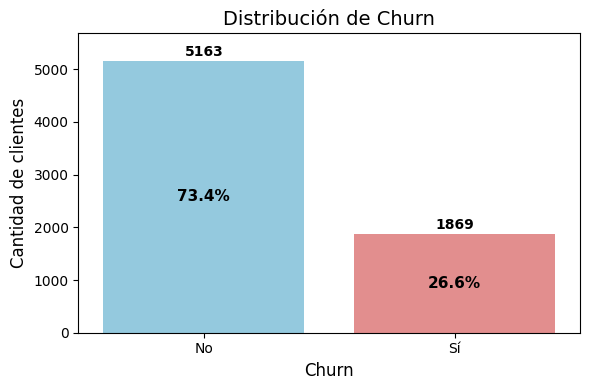

In [119]:
# creando grafico sencillo
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=datos, x='Churn', hue='Churn', palette=['skyblue', 'lightcoral'])
plt.title('Distribución de Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Agregar margen en el eje Y (10% arriba)
ax.margins(y=0.1)

# Calcular porcentajes
total = len(datos)
counts = datos['Churn'].value_counts().sort_index()

# Agregar texto (conteo arriba, porcentaje dentro)
for i, (index, count) in enumerate(counts.items()):
    percentage = f'{100 * count / total:.1f}%'

    # Número arriba
    ax.text(i, count + total * 0.005, str(count),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Porcentaje dentro
    ax.text(i, count/2, percentage,
            ha='center', va='center', fontsize=11,
            color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [120]:
#vamos a evaluar la vantidad de meses que tienen los clientes de los churnYes, respecto a los churnNo
# datosChurnYes['tenure'].describe()
ValoresUnicosChurnYes = datosChurnYes['tenure'].unique()
print(f" Valores unicos en la columna: {ValoresUnicosChurnYes}")

 Valores unicos en la columna: [ 4 13  3 45  1  2 40 11 49 21 37  7 15 12 25 22 58 10  6 70  5 28 27  9
 32  8 61 26 23 68 41 31 36 17 59 54 60 48 43 55 18 35 30 69 62 14 53 20
 64 16 67 47 65 46 24 52 34 72 56 38 50 63 29 57 66 51 42 33 39 71 19 44]


In [121]:
# ahora vamos a ver la cantidad e clientes por cada tenure en los churnYes
conteo = datosChurnYes['tenure'].value_counts().sort_index()
conteo_df = conteo.to_frame().T
print(conteo_df)



tenure   1    2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
count   380  123  94  83  64  40  51  42  46  45  31  38  38  24  37  28  26   

tenure  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
count   24  19  18  17  27  13  23  23  15  13  12  15  16  16  19  14  12   

tenure  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
count   15  10  15  13  14  13  14  14  15   6   6  12  14   9  15  10   8   

tenure  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  \
count    8  14  13   9  10   8  11   8   6   8   5   4   4   9  13  10   9   

tenure  69  70  71  72  
count    8  11   6   6  


In [122]:
#datosChurnNo['tenure'].describe()
ValoresUnicosChurnNo = datosChurnNo['tenure'].unique()
print(f" Valores unicos en la columna: {ValoresUnicosChurnNo}")

 Valores unicos en la columna: [ 9 71 63  7 65 54 72  5 56 34  1 50 23  3 55 26 69 37 49 66 67 20 43 59
 12 27 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 61 44  2 24 19 47
 62 46 22  4 52  8 60 48 41 11 53 15 68 17 18 28 36 31 51 13 45 21 38 42]


In [123]:
# ahora vamos a ver la cantidad e clientes por cada tenure en los ChurnNo
conteoChurnNo = datosChurnNo['tenure'].value_counts().sort_index()
conteo_dfChurnNo = conteoChurnNo.to_frame().T
print(conteo_dfChurnNo)

tenure   1    2    3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
count   233  115  106  93  69  70  80  81  73  71  68  79  71  52  62  52  61   

tenure  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
count   73  54  53  46  63  72  71  56  64  59  45  57  56  49  50  50  53   

tenure  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
count   73  40  50  46  42  51  56  51  50  45  55  62  54  55  51  58  60   

tenure  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  \
count   72  56  55  55  70  57  56  52  70  68  65  68  76  67  76  88  91   

tenure  69   70   71   72  
count   87  108  164  356  


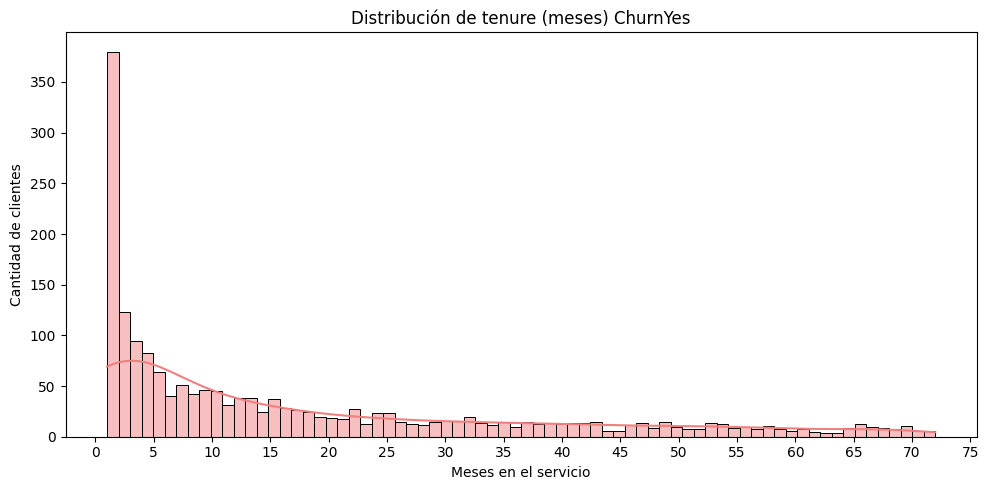

In [124]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10,5))
sns.histplot(datosChurnYes['tenure'], bins=72, kde=True, color='lightcoral')
plt.title('Distribución de tenure (meses) ChurnYes')
plt.xlabel('Meses en el servicio')
plt.ylabel('Cantidad de clientes')

# Configurar ticks principales cada 1 unidad
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5))

# Rotar etiquetas para mejor legibilidad si hay muchos valores
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

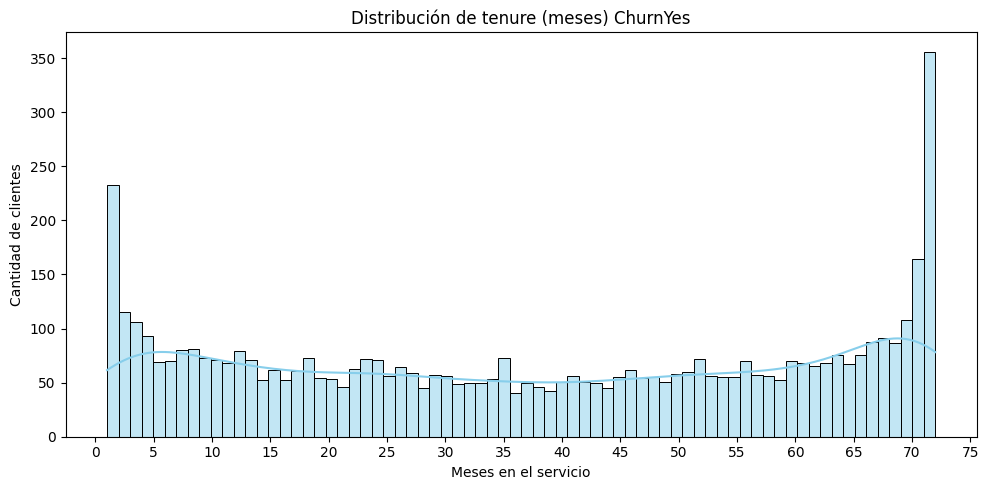

In [125]:
plt.figure(figsize=(10,5))
sns.histplot(datosChurnNo['tenure'], bins=72, kde=True, color='skyblue')
plt.title('Distribución de tenure (meses) ChurnYes')
plt.xlabel('Meses en el servicio')
plt.ylabel('Cantidad de clientes')

# Configurar ticks principales cada 1 unidad
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5))

# Rotar etiquetas para mejor legibilidad si hay muchos valores
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.Efecto del gasto mensual


In [126]:
# ahora vamos a evaluar que impacto tiene el pago mensual y el total facturado de ambos, tanto ChurnNo como ChurnYes
datosChurnYes[['Charges.Monthly', 'Charges.Total']].describe()

,Charges.Monthly,Charges.Total
count,1869.000000,1869.000000
mean,74.441332,1531.796094
std,24.666053,1890.822994
min,18.850000,18.850000
25%,56.150000,134.500000
50%,79.650000,703.550000
75%,94.200000,2331.300000
max,118.350000,8684.800000


In [127]:
datosChurnNo[['Charges.Monthly', 'Charges.Total']].describe()

,Charges.Monthly,Charges.Total
count,5163.000000,5163.000000
mean,61.307408,2555.344141
std,31.094557,2329.456984
min,18.250000,18.800000
25%,25.100000,577.825000
50%,64.450000,1683.600000
75%,88.475000,4264.125000
max,118.750000,8672.450000


In [128]:
# Vamos a evaluar la media de Charges.Monthly, para determinar cuanto porcentaje mas esta pagando los clientes con ChurnYes respecto a los ChurnNo
porcentajeMediaChurnYes = (datosChurnYes['Charges.Monthly'].mean() - datosChurnNo['Charges.Monthly'].mean()) / datosChurnNo['Charges.Monthly'].mean() * 100
print(f'El porcentaje medio de gasto mensual en los clientes ChurnYes es de: {porcentajeMediaChurnYes:.2f}% superior a los clientes con ChurnNo')


El porcentaje medio de gasto mensual en los clientes ChurnYes es de: 21.42% superior a los clientes con ChurnNo


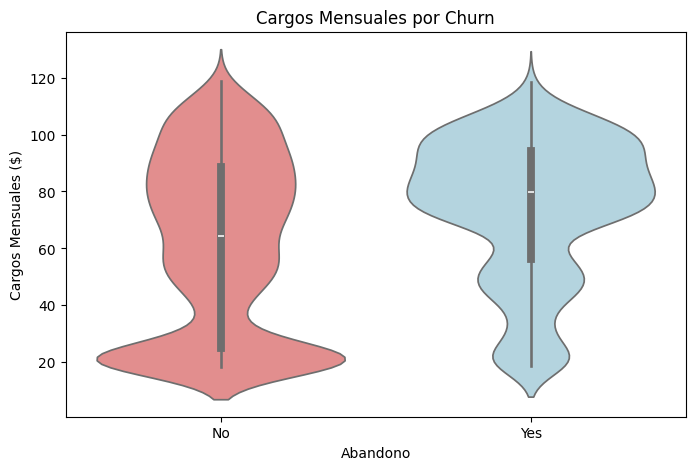

In [129]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Churn', y='Charges.Monthly', data=datos,
               hue='Churn', palette=['lightcoral','lightblue'], legend=False)
plt.title('Cargos Mensuales por Churn')
plt.xlabel('Abandono')
plt.ylabel('Cargos Mensuales ($)')
plt.show()

## 3.Porcentaje de usuarios que paga por encima del promedio y su tiempo de abandono





In [130]:
#Ahora vamos a ver que clientes pueden estar pagando mas del promedio en los ChurnYes
CantidadChurnYes = datosChurnYes[datosChurnYes['Charges.Monthly'] > datosChurnYes['Charges.Monthly'].mean()].shape[0]
CantidadChurnYes

1126

In [131]:
# ahora miraremos el procentaje que eso representa respecot a los clientes ChurnYes
porcentajeChurnYesSuperaPromedio = (CantidadChurnYes / datosChurnYes.shape[0]) * 100
porcentajeChurnYesSuperaPromedio

print(f'El porcentaje de clientes ChurnYes que paga por encima del monto promedio mensulamente es de: {porcentajeChurnYesSuperaPromedio:.2f}% ')

El porcentaje de clientes ChurnYes que paga por encima del monto promedio mensulamente es de: 60.25% 


In [132]:
# de ese 60 % cual fue su tiempo de permanencia (tenure)
datosChurnYes[datosChurnYes['Charges.Monthly'] > datosChurnYes['Charges.Monthly'].mean()]['tenure'].reset_index( drop=True).describe()

,tenure
count,1126.000000
mean,22.813499
std,20.658898
min,1.000000
25%,5.000000
50%,16.000000
75%,37.000000
max,72.000000


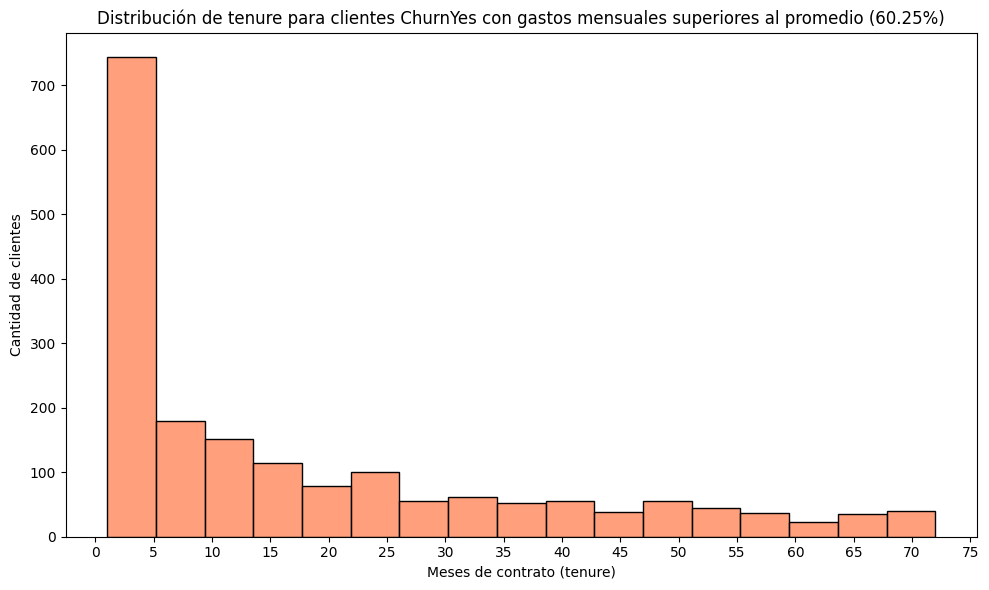

In [133]:
# Paso 6: Graficar la distribución de tenure para los ChunrYes
plt.figure(figsize=(10, 6))
sns.histplot(datosChurnYes["tenure"], kde=False, color="coral")
plt.title(f"Distribución de tenure para clientes ChurnYes con gastos mensuales superiores al promedio ({porcentajeChurnYesSuperaPromedio:.2f}%)")
plt.xlabel("Meses de contrato (tenure)")
plt.ylabel("Cantidad de clientes")
# Configurar ticks principales cada 5 unidad
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.tight_layout()
plt.show()

## 4.Cantidad de servicios contratados



In [134]:
# Ahora analizaremos el si los clientes con ChurnYes tienen contratados otros servicios con la empresa,
# lo que se espera con esta parte del analisis es que los cientes que dan la baja del servicio, no tengan otros productos contratados con la empresa,
# esto puede influir en la decision de un cliente de dar la baja, ya que al tener varios productos contratados es mas dificil irse con otro proveedor.
PhoneService_ChurnYes = datosChurnYes['PhoneService'].value_counts().get('Yes', 0)
MultipleLines_ChurnYes = datosChurnYes['MultipleLines'].value_counts().get('Yes', 0)
InternetService_ChurnYes = datosChurnYes[datosChurnYes['InternetService'] != 'No'].shape[0]
OnlineSecurity_ChurnYes = datosChurnYes['OnlineSecurity'].value_counts().get('Yes', 0)
OnlineBackup_ChurnYes = datosChurnYes['OnlineBackup'].value_counts().get('Yes', 0)
DeviceProtection_ChurnYes = datosChurnYes['DeviceProtection'].value_counts().get('Yes', 0)
TechSupport_ChurnYes  = datosChurnYes['TechSupport'].value_counts().get('Yes', 0)
StreamingTV_ChurnYes = datosChurnYes['StreamingTV'].value_counts().get('Yes', 0)
StreamingMovies_ChurnYes = datosChurnYes['StreamingMovies'].value_counts().get('Yes', 0)

print(f'Clientes ChurnYes con suscripción al servicio telefónico: {PhoneService_ChurnYes}')
print(f'Clientes ChurnYes con suscripción a más de una línea telefónica: {MultipleLines_ChurnYes}')
print(f'Clientes ChurnYes con suscripción a un proveedor de internet: {InternetService_ChurnYes}')
print(f'Clientes ChurnYes con suscripción adicional de seguridad en línea: {OnlineSecurity_ChurnYes}')
print(f'Clientes ChurnYes con suscripción adicional de respaldo en línea: {OnlineBackup_ChurnYes}')
print(f'Clientes ChurnYes con suscripción adicional de protección del dispositivo: {DeviceProtection_ChurnYes}')
print(f'Clientes ChurnYes con suscripción adicional de soporte técnico, menor tiempo de espera: {TechSupport_ChurnYes}')
print(f'Clientes ChurnYes con suscripción de televisión por cable: {StreamingTV_ChurnYes}')
print(f'Clientes ChurnYes con suscripción de streaming de películas: {StreamingMovies_ChurnYes}')


Clientes ChurnYes con suscripción al servicio telefónico: 1699
Clientes ChurnYes con suscripción a más de una línea telefónica: 850
Clientes ChurnYes con suscripción a un proveedor de internet: 1756
Clientes ChurnYes con suscripción adicional de seguridad en línea: 295
Clientes ChurnYes con suscripción adicional de respaldo en línea: 523
Clientes ChurnYes con suscripción adicional de protección del dispositivo: 545
Clientes ChurnYes con suscripción adicional de soporte técnico, menor tiempo de espera: 310
Clientes ChurnYes con suscripción de televisión por cable: 814
Clientes ChurnYes con suscripción de streaming de películas: 818


In [135]:
# ahora veremos una informacion mucho mas completa

# Lista de columnas de servicios
servicios = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Crear columna con el conteo de servicios contratados
datosChurnYes.loc[:, 'ServiciosContratados'] = (datosChurnYes[servicios] != 'No').sum(axis=1)


# DataFrame final con customerID y conteo
df_servicios = datosChurnYes[['customerID', 'ServiciosContratados']]

print(df_servicios)


      customerID  ServiciosContratados
2     0004-TLHLJ                     3
3     0011-IGKFF                     6
4     0013-EXCHZ                     4
18    0022-TCJCI                     5
19    0023-HGHWL                     2
...          ...                   ...
7243  9961-JBNMK                     5
7246  9965-YOKZB                     4
7260  9985-MWVIX                     2
7261  9986-BONCE                     7
7263  9992-RRAMN                     4

[1869 rows x 2 columns]


/tmp/ipython-input-3415324002.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosChurnYes.loc[:, 'ServiciosContratados'] = (datosChurnYes[servicios] != 'No').sum(axis=1)


In [136]:
# obtendiendo el porcentaje de personas que tienen contratado N cantidad de servcios:
# Conteo en porcentaje
porcentajes = datosChurnYes['ServiciosContratados'].value_counts(normalize=True).sort_index() * 100

print(porcentajes)


ServiciosContratados
2    13.001605
3    20.813269
4    19.315142
5    16.372392
6    12.841091
7    13.911182
8     3.156768
9     0.588550
Name: proportion, dtype: float64


In [137]:
suma = porcentajes.sum()
print(suma)

100.0


In [138]:
df_servicios.describe()

,ServiciosContratados
count,1869.000000
mean,4.525415
std,1.742227
min,2.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,9.000000


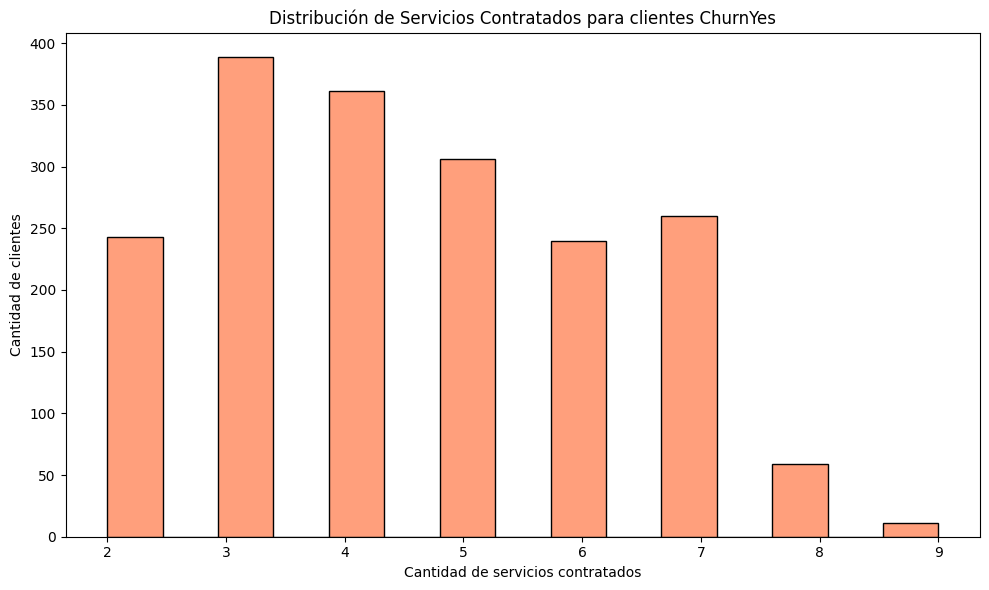

In [139]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10, 6))
sns.histplot(df_servicios['ServiciosContratados'], kde=False, color="coral")
plt.title(f"Distribución de Servicios Contratados para clientes ChurnYes")
plt.xlabel("Cantidad de servicios contratados")
plt.ylabel("Cantidad de clientes")
# Configurar ticks principales cada 1 unidad
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.tight_layout()
plt.show()

## 5.Tipo de contrato para los churnYes


In [140]:
# ahora vamos a revisar como se relaciona el pago mesual con el tipo de contrato en los churnYes
datosChurnYes['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [141]:
# vamos a contar
conteo_contract = datosChurnYes['Contract'].value_counts().sort_index().reset_index()
conteo_contract

,Contract,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


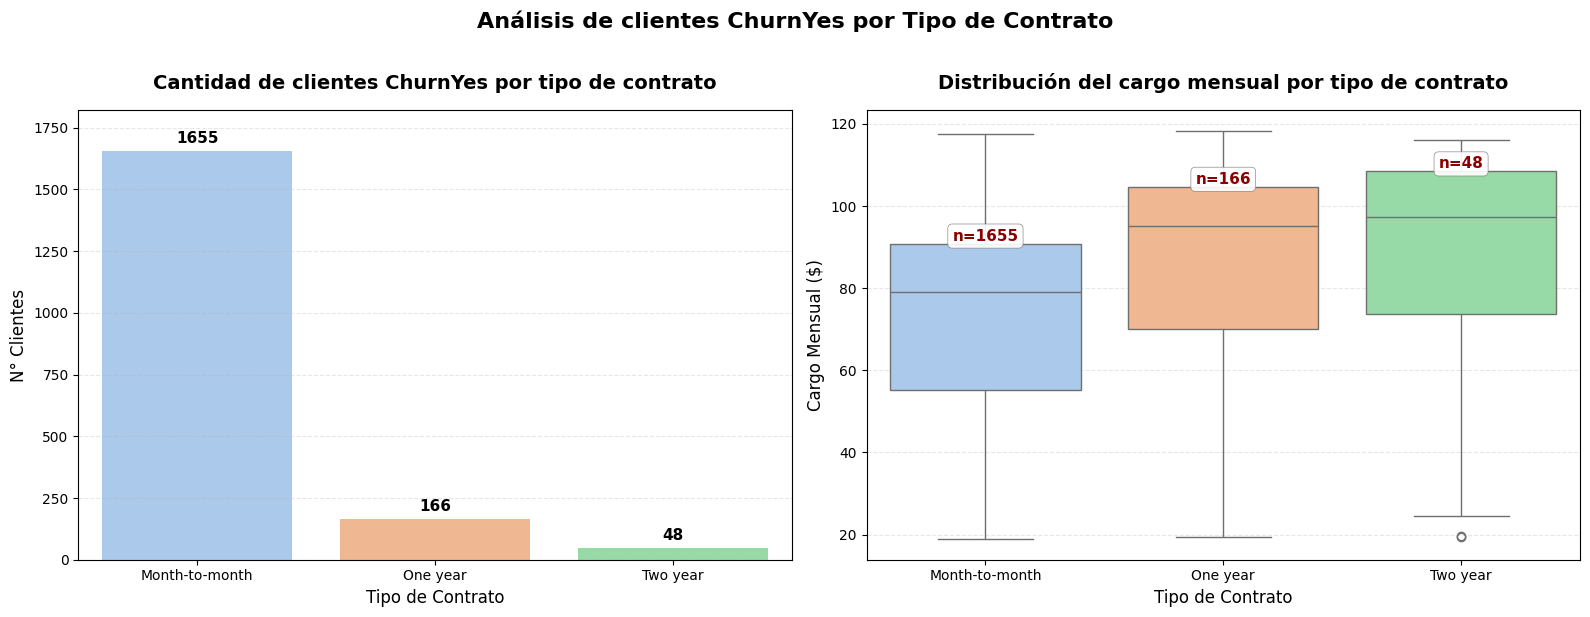

In [142]:
# graficamos un 2 en 1
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ==============================================
# GRÁFICO 1: Barplot de conteo de clientes por contrato
# ==============================================
ax1 = axes[0]
sns.barplot(x='Contract', y='count', data=conteo_contract,
            hue='Contract', palette='pastel', legend=False, ax=ax1)

ax1.set_title('Cantidad de clientes ChurnYes por tipo de contrato',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Tipo de Contrato', fontsize=12)
ax1.set_ylabel('N° Clientes', fontsize=12)

# poniendo los números dentro de las barras con mejor formato
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=11, color='black', fontweight='bold')

# Ajustar el límite superior del eje Y para evitar que los números pisen la línea
ax1.set_ylim(top=conteo_contract['count'].max() * 1.1) # Añade un 10% de padding

# Ajustar formato del eje Y (sin notación científica si hay números grandes)
ax1.ticklabel_format(style='plain', axis='y')

# ==============================================
# GRÁFICO 2: Boxplot de cargos mensuales por contrato
# ==============================================
ax2 = axes[1]
sns.boxplot(x='Contract', y='Charges.Monthly',
            data=datosChurnYes, hue='Contract',
            palette='pastel', legend=False, ax=ax2)

ax2.set_title('Distribución del cargo mensual por tipo de contrato',
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Tipo de Contrato', fontsize=12)
ax2.set_ylabel('Cargo Mensual ($)', fontsize=12)

# Obtener conteos para el boxplot
contract_counts = datosChurnYes['Contract'].value_counts().reset_index()
contract_counts.columns = ['Contract', 'Count']

# Obtener los percentiles 75 (parte superior de la caja)
q3_values = datosChurnYes.groupby('Contract')['Charges.Monthly'].quantile(0.75)

# Añadir los números en la parte superior de cada caja con mejor formato
for i, contract in enumerate(contract_counts['Contract']):
    count = contract_counts[contract_counts['Contract'] == contract]['Count'].values[0]
    q3_val = q3_values[contract]

    # Crear una caja blanca de fondo para mejor legibilidad
    ax2.text(i, q3_val, f'n={count}',
            ha='center', va='bottom', fontsize=11,
            fontweight='bold', color='darkred',
            bbox=dict(boxstyle="round,pad=0.3",
                     facecolor="white",
                     alpha=0.9,
                     edgecolor='gray', linewidth=0.5))

# Formato del eje Y
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# ajustes de diseño

ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# es importante que ambos gráficos tengan los mismos ticks en X  y en el mismo orden los tipo de contrato
# para la comparación visual
contracts_orden = conteo_contract['Contract'].tolist()
ax1.set_xticks(range(len(contracts_orden)))
ax1.set_xticklabels(contracts_orden, rotation=0 if len(contracts_orden) <= 3 else 15)
ax2.set_xticks(range(len(contracts_orden)))
ax2.set_xticklabels(contracts_orden, rotation=0 if len(contracts_orden) <= 3 else 15)

# titulo
fig.suptitle('Análisis de clientes ChurnYes por Tipo de Contrato',
             fontsize=16, fontweight='bold', y=1.02)

# espaciado entre subplots
plt.tight_layout()

plt.show()

## 6.Análisis del impacto del Soporte Técnico:

In [143]:
# Como tecnico de soporte, voy a agregar el siguiente insight que se que puede ser un factor importante en el churnYes
# evaluaremos como que cantidad de clientes con churnYes respecto a los churnNo
TechSupport_ChurnYes  = datosChurnYes['TechSupport'].value_counts().get('Yes', 0)
TechSupport_ChurnNo  = datosChurnNo['TechSupport'].value_counts().get('Yes', 0)

print(f'Clientes ChurnYes con soporte técnico: {TechSupport_ChurnYes}')
print(f'Clientes ChurnNo con soporte técnico: {TechSupport_ChurnNo}')

Clientes ChurnYes con soporte técnico: 310
Clientes ChurnNo con soporte técnico: 1730


In [144]:
# ahora calculamos cuanto representan esos numeros en porcentaje
porcentajeChurnYes = (TechSupport_ChurnYes / datosChurnYes.shape[0]) * 100
porcentajeChurnNo = (TechSupport_ChurnNo / datosChurnNo.shape[0]) * 100

print(f'El porcentaje de clientes ChurnYes con soporte técnico es de: {porcentajeChurnYes:.2f}% ')
print(f'El porcentaje de clientes ChurnNo con soporte técnico es de: {porcentajeChurnNo:.2f}% ')

El porcentaje de clientes ChurnYes con soporte técnico es de: 16.59% 
El porcentaje de clientes ChurnNo con soporte técnico es de: 33.51% 


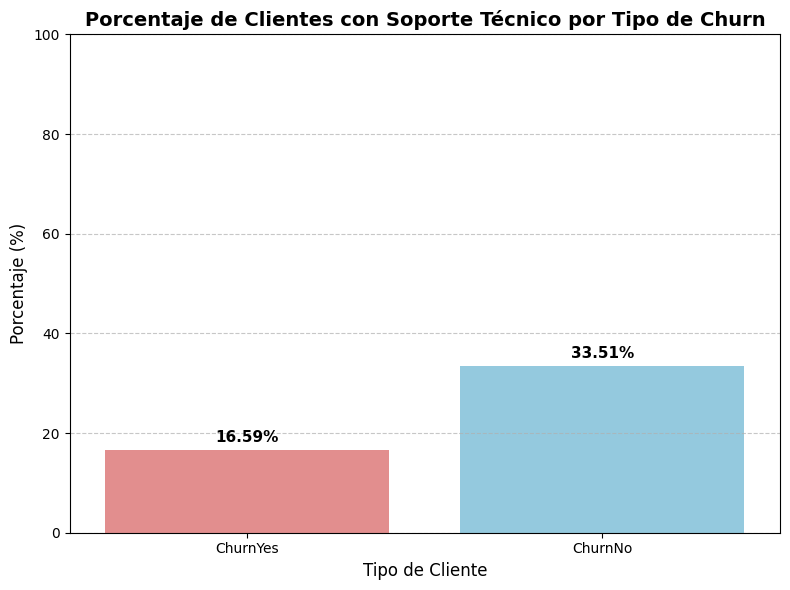

In [145]:
# graficamos
data = {
    'Tipo de Cliente': ['ChurnYes', 'ChurnNo'],
    'Con Soporte Técnico': [TechSupport_ChurnYes, TechSupport_ChurnNo],
    'Porcentaje': [porcentajeChurnYes, porcentajeChurnNo]
}
df_techsupport = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Cliente', y='Porcentaje', hue='Tipo de Cliente', data=df_techsupport, palette=['lightcoral', 'skyblue'], legend=False)

# Añadir etiquetas y título
plt.title('Porcentaje de Clientes con Soporte Técnico por Tipo de Churn', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.ylim(0, 100) # Asegurar que el eje Y vaya de 0 a 100%

# Añadir los valores de porcentaje en las barras
for index, row in df_techsupport.iterrows():
    plt.text(index, row['Porcentaje'] + 1, f"{row['Porcentaje']:.2f}%", color='black', ha="center", va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#📄Informe final

Para este analisis considere como ingiths mas importante los siguientes elementos:



| Insight | ¿Qué se evaluó? |
|---------|-------------|
| **1. Distribución del churn y tiempo de permanencia para el ChurYes vs ChurNo** | Los clientes con menor tiempo de permanencia tienen mas posibilidades de solicitar la baja del servicio. |
| **2. Efecto del gasto mensual** | Los clientes con ChurnYes tienes un gasto mensual significativamente mayor que los ChurnNo |
| **3. Porcentaje de usuarios que paga por encima del promedio y su tiempo de abandono** | Los clientes con churnYes tienden a pagar mas que el promedio mensual y además un numero significativo de ellos no dura mas de 6 meses. |
| **4. Cantidad de servicios contratados** | La mayor parte de los clientes churnYes no contrata mas de 4 servicios con la empresa. |
| **5. Tipo de contrato para los churnYes** | Existe una relación entre el tipo de contrato y cargo mensual para los clientes chunr yes. |
| **6. Análisis del impacto del Soporte Técnico** | Los clientes con churnYes es bastante escaso el porcentaje de usuarios que no contrata el servicio de soporte. |

1. La cantidad de clientes con ChurnYes, suelen tener un tiempo de permanencia significativamente menor que los clientes con ChurnNo. la cantidad de clientes con ChurnNo tienen un tiempo de permanencia mucho mayor si se compara con el de los ChurnYes. Esto podria implicar que los esfuerzos de retencion de los clientes en los primeros meses es clave para que mantengan el servicio por mas tiempo.

2. La diferencia en el porcentaje de gasto mensual entre los clientes con ChurnYes y ChurnNo puede repressentar que los clientes prefieren dar la baja del servicio en los primeros meses, al darse cuenta que mensualmente gastan mucho mas.


3. Aproximadamente el 60% de los clientes con ChurnYes pagaba mensualmente más del pago mensual promedio de todos los clientes mensualmente de los cuales al menos 700 usuarios dieron la baja del servicio antes de los primeros 6 meses.

4. Podemos observar que la mayoría de clientes con churnYes tienden a tener un número bajo de servicios contratados, con picos en 2, 3 y 4 servicios. Esto sugiere que los clientes con menos servicios son más propensos a darse de baja. El 75% de los clientes 'ChurnYes' tienen 6 servicios o menos, y el promedio es de 4.5 servicios contratados, lo que refuerza la idea de que la falta de múltiples servicios puede ser un factor en la decisión de abandonar.

5. Los graficos muestran que los clientes con chunrYes, que mas solicitan la baja tienen contrato Month-to-Month, ademas el diagrama de cajas muestra la distribución de los cargos mensuales (Charges.Monthly) para los clientes ChurnYes, agrupados por el tipo de contrato (Contract).
Month-to-month (Mes a mes): La mayoría de los clientes que se van y tienen contratos mensuales pagan las tarifas mensuales más altas, con una mediana y valores atípicos que se extienden a los cargos más elevados. Esto sugiere que los clientes con contratos mes a mes y tarifas altas tienen una mayor tendencia al abandono.
One year (Un año) y Two year (Dos años): Los clientes con contratos de uno o dos años que abandonan tienen cargos mensuales generalmente más bajos en comparación con los contratos mes a mes. Esto podría indicar que, aunque se van, no suelen ser los que tienen los planes más caros.
En resumen, los contratos mensuales con altos cargos parecen ser un factor de riesgo para el abandono.

6. El gráfico muestra claramente que los clientes que **no** abandonan (ChurnNo) tienen un porcentaje significativamente mayor de suscripción al servicio de soporte técnico (33.51%) en comparación con aquellos clientes que **sí** abandonan (ChurnYes), cuyo porcentaje es del 16.59%.
En mi experiencia tener el servicio de soporte técnico es un factor importante en la retención de clientes. Los clientes que cuentan con este servicio adicional parecen estar más satisfechos o se sienten más respaldados, lo que reduce su probabilidad de darse de baja. Podría ser que este servicio les ayude a resolver problemas y a tener una mejor experiencia general con la empresa.